In [ ]:
# Generic Library
import zipfile
import os
import csv

In [ ]:

# ML Library

import matplotlib.pyplot as plt
import tensorflow as tf
import numpy as np

In [ ]:
!gdown 1VhKu0jBAzaeBTLnSj1M_F0DEJttIIeA2

Downloading...
From: https://drive.google.com/uc?id=1VhKu0jBAzaeBTLnSj1M_F0DEJttIIeA2
To: /content/dataset.zip
100% 279M/279M [00:02<00:00, 92.9MB/s]


In [ ]:
cwd = os.getcwd()
print(cwd)

/content


In [ ]:
zip_dataset = 'dataset.zip'
zip_ref = zipfile.ZipFile(zip_dataset,'r')
zip_ref.extractall(f'{cwd}/datasets/')
zip_ref.close()

In [ ]:
def count_images_in_directory(directory):
    files = os.listdir(directory)
    return len(files)

# Path to train data of each class
train_coccidiosis_path = f'{cwd}/datasets/train/coccidiosis/'
train_healthy_path = f'{cwd}/datasets/train/healthy/'
train_ncd_path = f'{cwd}/datasets/train/ncd/'
train_salmonella_path = f'{cwd}/datasets/train/salmonella/'

# Path to validation data of each class
val_coccidiosis_path = f'{cwd}/datasets/val/coccidiosis/'
val_healthy_path = f'{cwd}/datasets/val/healthy/'
val_ncd_path = f'{cwd}/datasets/val/ncd/'
val_salmonella_path = f'{cwd}/datasets/val/salmonella/'

# Path to test data of each class
test_coccidiosis_path = f'{cwd}/datasets/test/coccidiosis/'
test_healthy_path = f'{cwd}/datasets/test/healthy/'
test_ncd_path = f'{cwd}/datasets/test/ncd/'
test_salmonella_path = f'{cwd}/datasets/test/salmonella/'

# Count the number of images in each directory
train_coccidiosis_count = count_images_in_directory(train_coccidiosis_path)
train_healthy_count = count_images_in_directory(train_healthy_path)
train_ncd_count = count_images_in_directory(train_ncd_path)
train_salmonella_count = count_images_in_directory(train_salmonella_path)

val_coccidiosis_count = count_images_in_directory(val_coccidiosis_path)
val_healthy_count = count_images_in_directory(val_healthy_path)
val_ncd_count = count_images_in_directory(val_ncd_path)
val_salmonella_count = count_images_in_directory(val_salmonella_path)

test_coccidiosis_count = count_images_in_directory(test_coccidiosis_path)
test_healthy_count = count_images_in_directory(test_healthy_path)
test_ncd_count = count_images_in_directory(test_ncd_path)
test_salmonella_count = count_images_in_directory(test_salmonella_path)

# Print the image counts
print('Train:')
print(f'Coccidiosis: {train_coccidiosis_count} images')
print(f'Healthy: {train_healthy_count} images')
print(f'NCD: {train_ncd_count} images')
print(f'Salmonella: {train_salmonella_count} images')

print('\nValidation:')
print(f'Coccidiosis: {val_coccidiosis_count} images')
print(f'Healthy: {val_healthy_count} images')
print(f'NCD: {val_ncd_count} images')
print(f'Salmonella: {val_salmonella_count} images')

print('\nTest:')
print(f'Coccidiosis: {test_coccidiosis_count} images')
print(f'Healthy: {test_healthy_count} images')
print(f'NCD: {test_ncd_count} images')
print(f'Salmonella: {test_salmonella_count} images')


Train:
Coccidiosis: 1733 images
Healthy: 1682 images
NCD: 393 images
Salmonella: 1837 images

Validation:
Coccidiosis: 495 images
Healthy: 480 images
NCD: 112 images
Salmonella: 525 images

Test:
Coccidiosis: 248 images
Healthy: 242 images
NCD: 57 images
Salmonella: 263 images


Sample coccidiosis image:


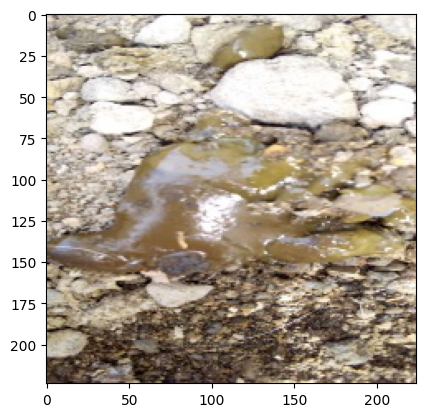


Sample healthy image:


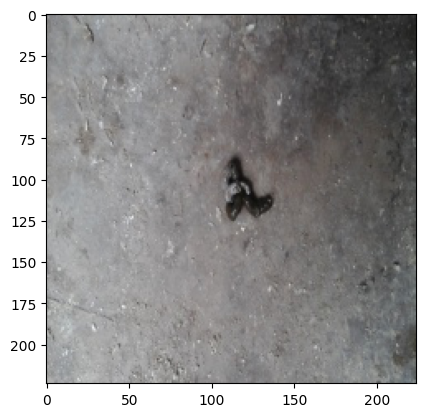


Sample ncd image:


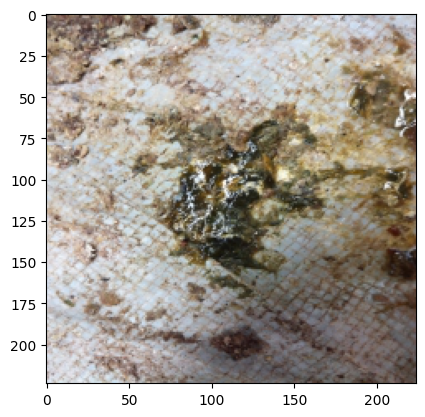


Sample salmonella image:


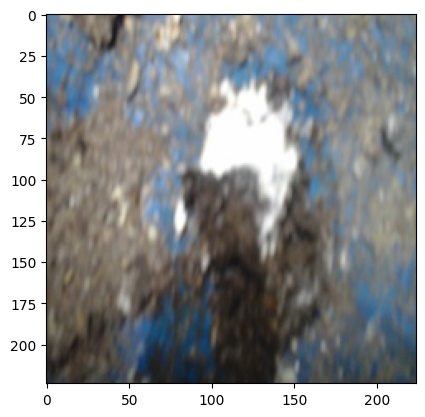

In [ ]:
# grader-required-cell

from tensorflow.keras.preprocessing.image import load_img

print("Sample coccidiosis image:")
plt.imshow(load_img(f"{os.path.join(train_coccidiosis_path, os.listdir(train_coccidiosis_path)[0])}"))
plt.show()

print("\nSample healthy image:")
plt.imshow(load_img(f"{os.path.join(train_healthy_path, os.listdir(train_healthy_path)[0])}"))
plt.show()

print("\nSample ncd image:")
plt.imshow(load_img(f"{os.path.join(train_ncd_path, os.listdir(train_ncd_path)[0])}"))
plt.show()

print("\nSample salmonella image:")
plt.imshow(load_img(f"{os.path.join(train_salmonella_path, os.listdir(train_salmonella_path)[0])}"))
plt.show()


In [ ]:
from tensorflow.keras.preprocessing.image import img_to_array

# Load the first example of a happy face
sample_image  = load_img(f"{os.path.join(train_coccidiosis_path, os.listdir(train_coccidiosis_path)[0])}")

# Convert the image into its numpy array representation
sample_array = img_to_array(sample_image)

print(f"Each image has shape: {sample_array.shape}")

print(f"The maximum pixel value used is: {np.max(sample_array)}")



Each image has shape: (224, 224, 3)
The maximum pixel value used is: 255.0


In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Create a data generator instance
image_datagen = ImageDataGenerator(rescale=1./255)

# Create a train generator
train_generator = image_datagen.flow_from_directory(
        f'{cwd}/datasets/train/',  # This is the source directory for training images
        target_size=(224, 224),  # All images will be resized to 224x224
        batch_size=64,
        class_mode='categorical')

# Create a validation generator
val_generator = image_datagen.flow_from_directory(
        f'{cwd}/datasets/val/',  # This is the source directory for training images
        target_size=(224, 224),  # All images will be resized to 224x224
        batch_size=64,
        class_mode='categorical')


Found 5645 images belonging to 4 classes.
Found 1612 images belonging to 4 classes.


In [ ]:
import tensorflow_hub as hub

mobilenet_v2 = "https://tfhub.dev/google/tf2-preview/mobilenet_v2/feature_vector/4"
mobile_net_layers = hub.KerasLayer(mobilenet_v2, input_shape=(224,224,3))
mobile_net_layers.trainable = False

In [ ]:
#create tensorflow model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

model = Sequential([
    mobile_net_layers,
    # Conv2D(32, (3, 3), activation='relu', input_shape=(224, 224, 3)),
    # MaxPooling2D((2, 2)),
    # Conv2D(64, (3, 3), activation='relu'),
    # MaxPooling2D((2, 2)),
    # Conv2D(128, (3, 3), activation='relu'),
    # MaxPooling2D((2, 2)),
    # Conv2D(64, (3, 3), activation='relu'),
    # MaxPooling2D((2, 2)),
    # Conv2D(64, (3, 3), activation='relu'),
    # MaxPooling2D((2, 2)),
    # Conv2D(64, (3, 3), activation='relu'),
    # MaxPooling2D((2, 2)),
    Dropout(0.3),
    Flatten(),
    # Dense(512, activation='relu'),
    Dense(4, activation='softmax')
])
model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 keras_layer_3 (KerasLayer)  (None, 1280)              2257984   
                                                                 
 dropout_3 (Dropout)         (None, 1280)              0         
                                                                 
 flatten_5 (Flatten)         (None, 1280)              0         
                                                                 
 dense_9 (Dense)             (None, 4)                 5124      
                                                                 
Total params: 2,263,108
Trainable params: 5,124
Non-trainable params: 2,257,984
_________________________________________________________________


In [ ]:
#compile model
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001), loss='categorical_crossentropy', metrics=['accuracy'])

In [ ]:
#constant for number of epochs
NUM_EPOCHS = 10

#fit model
history = model.fit(train_generator, epochs=NUM_EPOCHS, validation_data=val_generator, verbose=1)

Epoch 1/10
89/89 [==============================] - 24s 258ms/step - loss: 0.5643 - accuracy: 0.7919 - val_loss: 0.3088 - val_accuracy: 0.9051
Epoch 2/10
89/89 [==============================] - 22s 247ms/step - loss: 0.3116 - accuracy: 0.8903 - val_loss: 0.2619 - val_accuracy: 0.9150
Epoch 3/10
89/89 [==============================] - 23s 256ms/step - loss: 0.2634 - accuracy: 0.9082 - val_loss: 0.2452 - val_accuracy: 0.9231
Epoch 4/10
89/89 [==============================] - 23s 257ms/step - loss: 0.2443 - accuracy: 0.9159 - val_loss: 0.2333 - val_accuracy: 0.9249
Epoch 5/10
89/89 [==============================] - 23s 255ms/step - loss: 0.2216 - accuracy: 0.9219 - val_loss: 0.2192 - val_accuracy: 0.9324
Epoch 6/10
89/89 [==============================] - 22s 252ms/step - loss: 0.2097 - accuracy: 0.9261 - val_loss: 0.2163 - val_accuracy: 0.9311
Epoch 7/10
89/89 [==============================] - 22s 243ms/step - loss: 0.1968 - accuracy: 0.9318 - val_loss: 0.2120 - val_accuracy: 0.9349

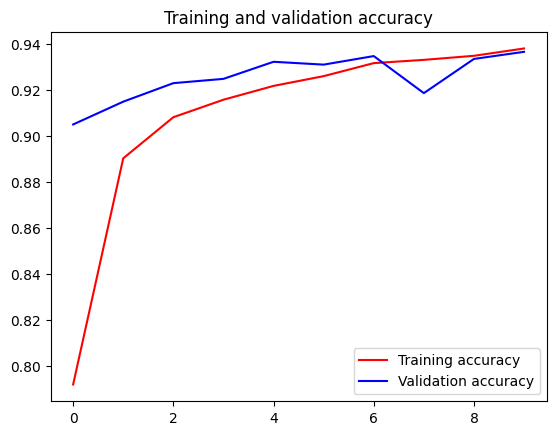

<Figure size 640x480 with 0 Axes>

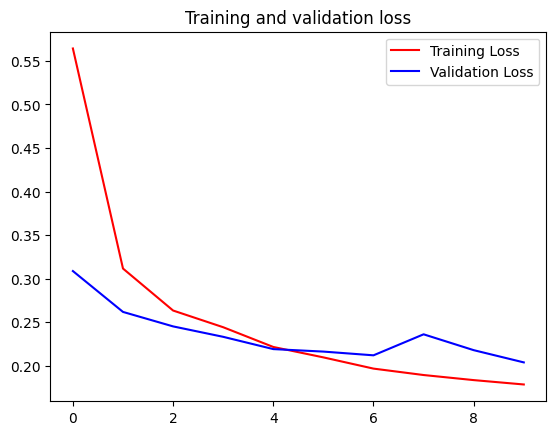

<Figure size 640x480 with 0 Axes>

In [ ]:
import matplotlib.pyplot as plt

# Plot the results
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'r', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend(loc=0)
plt.figure()
plt.show()

plt.plot(epochs, loss, 'r', label='Training Loss')
plt.plot(epochs, val_loss, 'b', label='Validation Loss')
plt.title('Training and validation loss')
plt.legend(loc=0)
plt.figure()
plt.show()

In [ ]:
# calculating the recall, precision and f1-score
from sklearn.metrics import classification_report, confusion_matrix

test_generator = image_datagen.flow_from_directory(
        f'{cwd}/datasets/test/',  # This is the source directory for training images
        target_size=(224, 224),  # All images will be resized to 224x224
        batch_size=16,
        class_mode='categorical')

Y_pred = model.predict(test_generator)
y_pred = np.argmax(Y_pred, axis=1)

print('Confusion Matrix')
print(confusion_matrix(test_generator.classes, y_pred))
print('Classification Report')
target_names = ['coccidiosis', 'healthy', 'ncd', 'salmonella']
print(classification_report(test_generator.classes, y_pred, target_names=target_names))

Found 810 images belonging to 4 classes.
51/51 [==============================] - 2s 39ms/step
Confusion Matrix
[[ 77  65  20  86]
 [ 75  59  22  86]
 [ 23  13   3  18]
 [ 71 100  19  73]]
Classification Report
              precision    recall  f1-score   support

 coccidiosis       0.31      0.31      0.31       248
     healthy       0.25      0.24      0.25       242
         ncd       0.05      0.05      0.05        57
  salmonella       0.28      0.28      0.28       263

    accuracy                           0.26       810
   macro avg       0.22      0.22      0.22       810
weighted avg       0.26      0.26      0.26       810



In [ ]:
#label map
label_map = {0: 'coccidiosis', 1: 'healthy', 2: 'ncd', 3: 'salmonella'}

def confidence_test(path, label):
    correct_predictions = 0
    total_predictions = 0

    for image_name in os.listdir(path):
        image_path = os.path.join(path, image_name)
        image = load_img(image_path, target_size=(224, 224))
        image_array = img_to_array(image)
        image_array = np.expand_dims(image_array, axis=0)
        predictions = model.predict(image_array)
        predicted_index = np.argmax(predictions)
        predicted_label = label_map[predicted_index]
        predicted_probability = predictions[0][predicted_index]

        print(f"The predicted label for the image {image_name} is: {predicted_label}")
        print(f"The confidence for this prediction is: {predicted_probability}")

        if predicted_label == label:
            correct_predictions += 1

        total_predictions += 1

    return correct_predictions / total_predictions

test_path = os.path.join(cwd, 'datasets', 'test')

class_labels = ['coccidiosis', 'healthy', 'ncd', 'salmonella']
class_confidences = {}

for class_label in class_labels:
    class_path = os.path.join(test_path, class_label)
    class_confidence = confidence_test(class_path, class_label)
    class_confidences[class_label] = class_confidence


1/1 [==============================] - 0s 456ms/step
The predicted label for the image cocci.747.jpg is: healthy
The confidence for this prediction is: 0.8408362865447998
1/1 [==============================] - 0s 27ms/step
The predicted label for the image cocci.1401.jpg is: salmonella
The confidence for this prediction is: 0.626493513584137
1/1 [==============================] - 0s 23ms/step
The predicted label for the image cocci.187.jpg is: healthy
The confidence for this prediction is: 0.8556618094444275
1/1 [==============================] - 0s 24ms/step
The predicted label for the image cocci.252.jpg is: healthy
The confidence for this prediction is: 0.7896493077278137
1/1 [==============================] - 0s 24ms/step
The predicted label for the image cocci.106.jpg is: salmonella
The confidence for this prediction is: 0.5753863453865051
1/1 [==============================] - 0s 22ms/step
The predicted label for the image cocci.932.jpg is: salmonella
The confidence for this pred

In [ ]:
for class_label, confidence in class_confidences.items():
    print(f"The model correctly predicted {confidence * 100}% of the {class_label} images")

The model correctly predicted 0.0% of the coccidiosis images
The model correctly predicted 30.57851239669421% of the healthy images
The model correctly predicted 0.0% of the ncd images
The model correctly predicted 69.58174904942965% of the salmonella images


## Generate a model

In [ ]:
export_path = "saved_model/1"
tf.saved_model.save(model, export_path)

In [ ]:
# Convert the model
converter = tf.lite.TFLiteConverter.from_saved_model(export_path)
converter.optimizations = [tf.lite.Optimize.DEFAULT]
tflite_model = converter.convert()

# Save the model.
tflite_model_file = 'model.tflite'

with open(tflite_model_file, "wb") as f:
    f.write(tflite_model)


In [ ]:
import pathlib

tflite_model_file = 'model.tflite'
tflite_model_file = pathlib.Path(tflite_model_file)

# Get the file size of the model in MegaBytes
print(f"The size of the tflite model is: {round(tflite_model_file.stat().st_size / (1024 * 1024), 2)} MB")

The size of the tflite model is: 42.35 MB
